In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout, MaxPool2D
from tensorflow import keras
tf.config.list_physical_devices('GPU')

%config InlineBackend.figure_format = 'svg'

%matplotlib inline 


In [2]:
data = np.load('data_bw-embeddings.npz')
trainX, trainy, testX, testy =  data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

Dataset: train=1065, test=452


In [3]:
# 下一步是对人脸嵌入向量进行归一化，使得向量的幅值为1：
# l2-normalization
from sklearn.preprocessing import Normalizer
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

In [4]:
# 下一步是将每个名人姓名的字符串目标变量转换为整数
from sklearn.preprocessing import LabelEncoder
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

In [5]:
from sklearn.svm import SVC
model = SVC()
model.fit(trainX, trainy)

SVC()

In [6]:
from sklearn.metrics import accuracy_score
# 预测
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# 评估准确率
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# 打印结果
print('Accuracy: train=%.3f, test=%.3f'  %  (score_train*100,  score_test*100))

Accuracy: train=100.000, test=98.009


In [7]:
# calculate the confusion matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(testy, yhat_test)
CM

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 57,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  3, 42,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0, 32,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 24,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, 23]], dtype=int64)

In [8]:
class_names = ['Arjun_Rampal', 'Arshad_Warsi', 'Asin', 'Ayushmann_Khurrana', 'Bhumi_Pednekar', 'Bipasha_Basu', 'Bobby_Deol', 'Deepika_Padukone', 'Disha_Patani', 'Emraan_Hashmi', 'Esha_Gupta', 'Farhan_Akhtar', 'Govinda']


from sklearn.metrics import classification_report
print(classification_report(testy, yhat_test, target_names=class_names))

                    precision    recall  f1-score   support

      Arjun_Rampal       1.00      1.00      1.00        31
      Arshad_Warsi       1.00      0.97      0.98        31
              Asin       0.98      1.00      0.99        45
Ayushmann_Khurrana       1.00      1.00      1.00        38
    Bhumi_Pednekar       0.97      1.00      0.98        32
      Bipasha_Basu       1.00      1.00      1.00        38
        Bobby_Deol       1.00      1.00      1.00        22
  Deepika_Padukone       0.90      0.98      0.94        58
      Disha_Patani       1.00      0.91      0.95        46
     Emraan_Hashmi       1.00      1.00      1.00        29
        Esha_Gupta       1.00      0.94      0.97        34
     Farhan_Akhtar       0.96      1.00      0.98        24
           Govinda       1.00      0.96      0.98        24

          accuracy                           0.98       452
         macro avg       0.99      0.98      0.98       452
      weighted avg       0.98      0.9

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

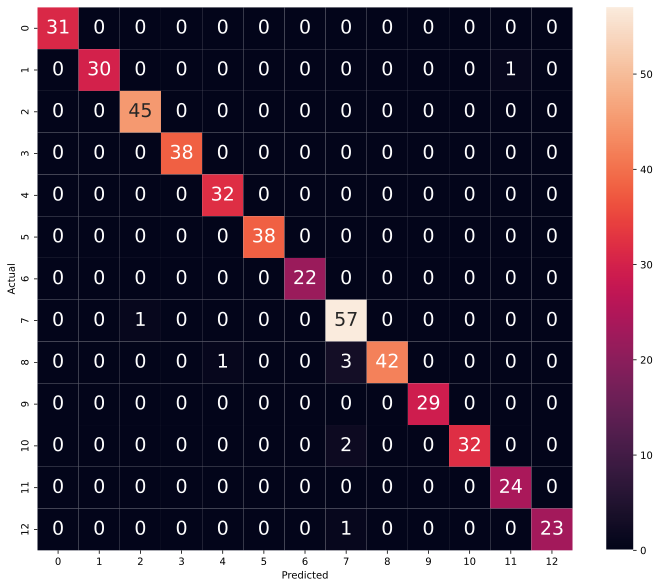

In [9]:
# plot the confusion matrix

# train confusion matrix
# data = confusion_matrix(trainy, yhat_train)

# test confusion matrix
data = confusion_matrix(testy, yhat_test)
df_cm = pd.DataFrame(data, columns=np.unique(testy), index = np.unique(testy))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (12, 10))
# sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 19}) 
plt.savefig("./figures/svm_confusion_test.png", dpi=800) 